# How to apply CNN models on Custom Build Datasets

### The Dataset Link
https://www.kaggle.com/sanikamal/horses-or-humans-dataset

# The biggest Problem: Data or Image LABELLING.

# Tensorflow Solution: ImageDataGenerator

In [1]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# train_data: is an instance on the ImageDataGenerator

In [2]:
train_data = ImageDataGenerator(rescale = 1/255)

# flow_from_directory method on class ImageDataGenerator takes the path to a directory and generates batches.

In [3]:
train_generator = train_data.flow_from_directory(
                    'horse-or-human/train/',
                    target_size = (300,300),
                    class_mode = 'binary'
)

Found 1027 images belonging to 2 classes.


## A DirectoryIterator yielding tuples of (x, y) where x is a numpy array containing a batch of images with shape (batch_size, *target_size, channels) and y is a numpy array of corresponding labels.

# Class_Mode is Binary for dual sets, Multiple sets will have a class_mode of type 'categorical'.

##### Constraint in using this Solution: The Directory Structure is Specified as
# Root Dir-->Train ----> Horses -------->*.jpg
#   |                  |
#   |                  |---------> Humans-------->*.jpg
#   |
#   |
#   |------->Validate ---------> horses-------->*.jpg
#                   |
#                   |--------------> Humans-------->*.jpg

### Lets Build a CNN Model for This Dataset

In [4]:
import tensorflow as tf

In [5]:
model = tf.keras.Sequential([
            tf.keras.layers.Conv2D(16,(3,3),activation = 'relu', input_shape = (300,300,3)),
            tf.keras.layers.MaxPooling2D(2,2),
            tf.keras.layers.Conv2D(32,(3,3), activation = 'relu'),
            tf.keras.layers.MaxPooling2D(2,2),
            tf.keras.layers.Conv2D(64,(3,3), activation = 'relu'),
            tf.keras.layers.MaxPooling2D(2,2),
            tf.keras.layers.Conv2D(64,(3,3), activation = 'relu'),
            tf.keras.layers.MaxPooling2D(2,2),
            tf.keras.layers.Conv2D(64,(3,3), activation = 'relu'),
            tf.keras.layers.MaxPooling2D(2,2),
            tf.keras.layers.Flatten(),
            tf.keras.layers.Dense(512, activation = 'relu'),
            tf.keras.layers.Dense(1, activation = 'sigmoid')
])

In [6]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 126, 126, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 63, 63, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 61, 61, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 30, 30, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 28, 28, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 12, 12, 64)        3

In [7]:
#tf.keras.utils.plot_model(model, show_shapes = True)

In [8]:
model.compile(optimizer='sgd', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [9]:
#history = model.fit_generator(train_generator, epochs = 5)

# Validation Vs Testing ---> Whats the Difference???
## Training Data ---> To teach the network to fit data to labels.
## Validation ---> To Check the network's performance while training with previously Unseen Data to inspect the fitting process.
### Testing ----> Inferencing on the previously Unseen Data.

In [10]:
validation_datagen = ImageDataGenerator(rescale = 1/255)
validate_generator = validation_datagen.flow_from_directory(
                    'horse-or-human/validation/',
                    target_size = (300,300),
                    class_mode = 'binary'
)

Found 256 images belonging to 2 classes.


# Incorporate Validation Generator into the training process.

In [11]:
history = model.fit(train_generator, epochs = 10, validation_data = validate_generator)

Epoch 1/10
33/33 [==============================] - 8s 143ms/step - loss: 0.6918 - accuracy: 0.5141 - val_loss: 0.6920 - val_accuracy: 0.5000
Epoch 2/10
33/33 [==============================] - 5s 143ms/step - loss: 0.6894 - accuracy: 0.5131 - val_loss: 0.6910 - val_accuracy: 0.5000
Epoch 3/10
33/33 [==============================] - 5s 145ms/step - loss: 0.6878 - accuracy: 0.5131 - val_loss: 0.6905 - val_accuracy: 0.5000
Epoch 4/10
33/33 [==============================] - 5s 141ms/step - loss: 0.6863 - accuracy: 0.5131 - val_loss: 0.6904 - val_accuracy: 0.5000
Epoch 5/10
33/33 [==============================] - 5s 138ms/step - loss: 0.6847 - accuracy: 0.5131 - val_loss: 0.6902 - val_accuracy: 0.5000
Epoch 6/10
33/33 [==============================] - 5s 139ms/step - loss: 0.6834 - accuracy: 0.5170 - val_loss: 0.6896 - val_accuracy: 0.5000
Epoch 7/10
33/33 [==============================] - 5s 143ms/step - loss: 0.6816 - accuracy: 0.5170 - val_loss: 0.6878 - val_accuracy: 0.5000
Epoch 

# How to Test this Trained Model?

### Predicting Images from Test Data

In [12]:
import matplotlib.pyplot as plt
import numpy as np
import os
from tensorflow.keras.preprocessing import image
X1 = []
path = 'Test_Images' 
img_list = os.listdir(path)
for img in img_list:
    img_test = image.load_img(path+'/'+img, target_size=(300,300))
    x = image.img_to_array(img_test)
    x = np.expand_dims(x, axis=0)
    X1.append(x)
X11 = np.array(X1)

In [17]:
# Select an image You want to Test (Max value = 30)
i = 5
X11[i]
img_list[i]
img_show = image.load_img(path+'/'+img_list[i])

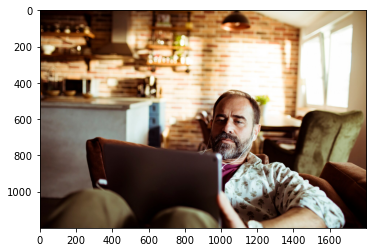

In [18]:
image_tensor = np.vstack([X11[i]])
## Images stacked Vertically to mimic the shape of training data
plt.imshow(img_show)

In [19]:
classes = model.predict(image_tensor)

In [20]:
if classes[0]>0.5:
    print(img_list[i] + " is human")
else:
    print(img_list[i] + " is a horse")

h13.jpg is human


## Why My Model is predicting h11 as a horse?

# Less Training 
## Less Variety of Training Data
### How to Increse the Variety of training data when we have less data?